In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import seaborn as sns
from matplotlib.lines import Line2D

## Clustering

In [148]:
dros_pd = pd.read_csv('all_annotated.csv')
dros_pd

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [149]:
dros_pd['median_fpkm'] = dros_pd.median(axis = 1)
dros_pd

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median_fpkm
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,18.002343
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.037699
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [150]:
# Drop rows with median FPKM that are 0
log2_df = dros_pd.loc[dros_pd['median_fpkm'] > 0]
log2_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median_fpkm
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570,18.002343
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622,7.408367
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486,16.617589
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521,51.024830
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049,71.833485
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891,211.546905
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090,1913.698243
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507,0.026254


In [151]:
#Apply a log2(FPKM + 0.1) transformation to the data.
log2_df[log2_df.columns[2:-1]] = np.log2(log2_df[log2_df.columns[2:-1]]+0.1)
log2_df

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median_fpkm
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,18.002343
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,7.408367
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,16.617589
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,51.024830
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,71.833485
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,211.546905
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,1913.698243
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.026254


In [152]:
sample_cl = linkage(log2_df[log2_df.columns[2:-1]])
sample_leaves = leaves_list(sample_cl)
sample_leaves

array([2710,  480, 3932, ..., 5684, 2530, 4296], dtype=int32)

In [153]:
log2_df_T = log2_df.T
log2_df_T

,3,8,9,10,11,12,13,16,32,37,...,34646,34647,34649,34656,34658,34663,34665,34667,34684,34715
t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216
gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12581,CG12582,...,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR41590,CR40679
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,5.82113,6.40385,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,4.05956,5.46229,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,3.60902,10.2568,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,6.89477,7.99489,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,6.12108,6.91031,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,7.81442,8.48709,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,7.52131,7.18584,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158


In [154]:
genes_cl = linkage(log2_df_T[2:-1][:])
genes_leaves = leaves_list(genes_cl)
genes_leaves

array([ 6, 14,  7, 15,  5, 13,  1,  4, 12, 11,  9,  3,  8,  0,  2, 10],
      dtype=int32)

In [155]:
# Rearrange columns based on linkage analysis
col_names = np.array(list(log2_df))
genes_num = list(genes_leaves+2)
genes_num.append(18)
first_cols = [0,1]
all_cols = np.array(first_cols+genes_num)
col_names = list(col_names[all_cols])

log2_df = log2_df[col_names]
log2_df

,t_name,gene_name,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12,median_fpkm
3,FBtr0302347,CR40182,4.518529,3.851021,3.558602,4.112914,4.749679,4.522507,3.593093,4.240476,4.995485,3.669331,3.809626,3.772605,4.459054,4.573651,4.383186,4.051558,18.002343
8,FBtr0113885,Parp,4.145813,-3.321928,3.436875,4.665883,-3.321928,2.066050,-3.321928,3.897757,4.353582,3.869772,-3.321928,-3.321928,-3.321928,3.472120,-3.321928,3.905799,7.408367
9,FBtr0301810,Alg-2,3.801070,2.897078,3.701063,4.516802,2.990301,2.913181,-3.321928,4.484797,4.784754,4.729653,1.594158,4.801878,4.222705,4.260622,3.900371,4.209672,16.617589
10,FBtr0113895,Tim17b,6.230339,5.621212,5.750615,6.280001,2.945977,4.998373,2.012708,6.072718,6.338167,6.286330,4.081859,6.130167,5.486961,2.681610,2.665469,5.728691,51.024830
11,FBtr0345179,Tim17b,6.345793,5.736589,5.901059,6.410012,6.953605,5.113628,3.552258,6.188155,6.453632,6.439396,4.196805,6.245611,5.602316,6.899972,6.909741,5.844084,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,6.166922,6.239269,6.945737,7.386673,4.675181,5.452891,0.209330,6.681296,7.891809,6.170259,-0.371506,8.696872,6.905339,5.063561,3.312209,5.597221,71.833485
34665,FBtr0100886,mt:ND1,8.493319,6.523595,7.797501,9.412730,5.778312,4.441070,-0.437467,8.350559,8.760742,8.615611,1.172241,9.014515,8.259794,4.661599,4.418274,7.649749,211.546905
34667,FBtr0100888,mt:lrRNA,11.283776,9.435277,10.690080,12.153787,9.213941,8.818194,5.095088,11.136488,6.942632,11.867576,6.260317,12.271701,11.332554,11.191931,9.857502,11.087133,1913.698243
34684,FBtr0114261,CR41590,-3.321928,-3.321928,-2.143405,-2.713053,-3.321928,-3.321928,-3.321928,-3.321928,-1.913863,-1.927886,-3.321928,-2.301821,0.003268,-2.534805,-2.348207,-3.321928,0.026254


In [156]:
reordered_df_T = log2_df.T
reordered_df_T

,3,8,9,10,11,12,13,16,32,37,...,34646,34647,34649,34656,34658,34663,34665,34667,34684,34715
t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216
gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12581,CG12582,...,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR41590,CR40679
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,7.81442,8.48709,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194
female_14C,3.85102,-3.32193,2.89708,5.62121,5.73659,4.05503,-3.32193,3.85776,7.03402,-3.32193,...,1.73617,8.2308,2.04013,2.9106,5.0296,6.23927,6.5236,9.43528,-3.32193,0.323943
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,7.52131,7.18584,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158
female_14D,4.11291,4.66588,4.5168,6.28,6.41001,5.21017,-3.32193,5.06268,7.17552,3.20128,...,10.6367,10.7277,6.73197,5.61745,7.76972,7.38667,9.41273,12.1538,-2.71305,1.06068
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,6.12108,6.91031,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193
female_14B,4.52251,2.06605,2.91318,4.99837,5.11363,3.46394,-3.32193,-3.32193,4.54745,-3.32193,...,6.13663,6.74422,3.19015,2.17001,4.52834,5.45289,4.44107,8.81819,-3.32193,-0.0956415
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,6.89477,7.99489,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674


In [157]:
# Rearrange columns based on linkage analysis
col_names = np.array(list(reordered_df_T))
col_names = list(col_names[sample_leaves])

reordered_df_T = reordered_df_T[col_names]
df_final = reordered_df_T.T
df_final

,t_name,gene_name,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12,median_fpkm
10838,FBtr0076479,RpS17,11.6279,-3.32193,6.51301,9.77081,9.91534,10.5946,9.67497,10.1861,9.66946,11.0419,9.91106,10.5334,-3.32193,10.3624,10.7307,9.1536,964.108
1771,FBtr0334681,RpS29,-3.32193,-3.32193,6.69042,-3.32193,-3.32193,6.32952,4.49586,-3.32193,6.83838,-3.32193,5.68185,6.307,-3.32193,5.83481,5.91096,5.84847,36.8484
15545,FBtr0302223,CG30382,-3.32193,-3.32193,-3.32193,-3.32193,7.33352,-3.32193,-3.32193,7.02943,6.8889,-3.32193,6.48671,-3.32193,6.0082,6.11652,6.33202,6.11236,32.1325
1772,FBtr0082136,RpS29,11.8912,-3.32193,11.5218,11.7157,11.4566,10.9772,9.58442,11.4266,11.3473,11.2101,9.87601,10.9039,10.5929,10.6166,10.7237,10.7906,1965.9
14830,FBtr0086092,CG10417,-3.32193,4.0114,7.22683,6.48274,4.77545,-3.32193,-3.32193,-3.32193,4.9061,6.53666,5.75068,6.88607,4.16595,5.60811,-3.32193,3.4297,22.569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17883,FBtr0089617,tra2,-3.32193,1.51055,-3.32193,-3.32193,0.565386,2.55643,4.21511,3.02251,2.51403,2.97532,4.40479,2.79692,3.744,3.69708,3.75314,4.14492,7.30693
23804,FBtr0343356,Crag,-3.32193,1.90428,-3.32193,-3.32193,2.20353,3.74278,4.45672,3.13313,3.0824,3.91854,3.6449,2.51506,4.03278,3.92896,2.93863,4.01511,8.5218
22645,FBtr0070627,CG2938,-3.32193,1.25238,-3.32193,-3.32193,4.19009,5.55147,3.59538,4.84624,5.20592,3.52497,4.24418,4.14277,2.71927,3.65446,5.37196,4.15993,15.0283
10127,FBtr0302045,qm,-3.32193,2.10858,-3.32193,-3.32193,4.01278,4.25903,3.73466,3.79831,4.62369,4.78255,4.11827,4.29294,4.21418,3.35493,3.55498,3.86194,14.1262


In [158]:
# Change df to numpy 2D array
x = df_final.iloc[:, 2:-1]
df = x[:].values
float_arr = df.astype(np.float)

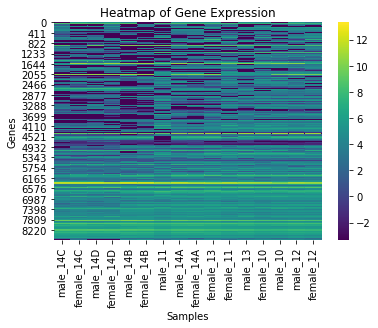

In [159]:
ax = plt.axes()
sns.heatmap(float_arr, ax = ax, xticklabels = list(df_final.columns)[2:-1],cmap = 'viridis')
ax.set_title('Heatmap of Gene Expression')
ax.set_xlabel('Samples')
ax.set_ylabel('Genes')
plt.show()

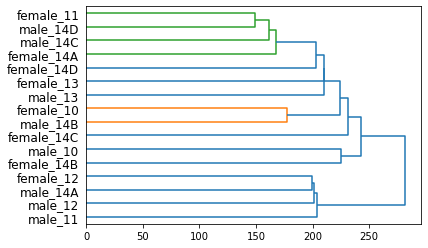

In [160]:
fig = plt.figure()
dn = dendrogram(genes_cl,orientation = 'right',labels=log2_df.columns[2:-1])
plt.show()

## Differential expression

In [161]:
# Process data so we can use stages and sex as variables in our analysis
model_df = log2_df.T
model_df.columns = model_df.iloc[0]
model_df = model_df.iloc[2:-1]
stages = [14.0,14.0,14.0,14.0,14.0,14.0,11.0,14.0,14.0,13.0,11.0,13.0,10.0,10.0,12.0,12.0]
sex = ['m','f','m','f','m','f','m','m','f','f','f','m','f','m','m','f']
model_df['sex'] = sex
model_df['stage'] = stages 
model_df

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,sex,stage
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194,m,14.0
female_14C,3.85102,-3.32193,2.89708,5.62121,5.73659,4.05503,-3.32193,3.85776,7.03402,-3.32193,...,2.04013,2.9106,5.0296,6.23927,6.5236,9.43528,-3.32193,0.323943,f,14.0
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158,m,14.0
female_14D,4.11291,4.66588,4.5168,6.28,6.41001,5.21017,-3.32193,5.06268,7.17552,3.20128,...,6.73197,5.61745,7.76972,7.38667,9.41273,12.1538,-2.71305,1.06068,f,14.0
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193,m,14.0
female_14B,4.52251,2.06605,2.91318,4.99837,5.11363,3.46394,-3.32193,-3.32193,4.54745,-3.32193,...,3.19015,2.17001,4.52834,5.45289,4.44107,8.81819,-3.32193,-0.0956415,f,14.0
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193,m,11.0
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674,m,14.0
female_14A,4.99549,4.35358,4.78475,6.33817,6.45363,5.07039,5.78468,2.32404,4.41083,3.7907,...,6.86782,6.4012,8.073,7.89181,8.76074,6.94263,-1.91386,2.80828,f,14.0
female_13,3.66933,3.86977,4.72965,6.28633,6.4394,4.89417,4.69217,-3.32193,-3.32193,4.32467,...,3.01588,5.54378,6.55551,6.17026,8.61561,11.8676,-1.92789,2.82867,f,13.0


In [162]:
# Run OLS for each transcript
transcripts = model_df.columns[0:8613]

pvals = []
sex_pvals = []
beta = []
for element in transcripts:
    model_df[element] = model_df[element].astype(float)
    df = pd.DataFrame({'y':model_df[element], 'x':model_df['stage'], 'sex':model_df['sex']})
    model = smf.ols(formula = "y ~ x", data = df)
    model_sex = smf.ols(formula = "y ~ x+sex", data = df)
    results = model.fit()
    sex_results = model_sex.fit()
    pvals.append(results.pvalues[1])
    sex_pvals.append(sex_results.pvalues[2])
    beta.append(sex_results.params[2])

In [163]:
pval_col = pvals
sex_pval_col = sex_pvals

In [164]:
# Append p values to df
log2_df['p'] = pval_col
log2_df['sex_p'] = sex_pval_col

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
# Generate exp. p values for QQ plot
pvals.sort()
sex_pvals.sort()
logP = -1 * np.log10(pvals)
sexlogP = -1 * np.log10(sex_pvals)

uni_points = list(range(0, len(transcripts)))
new_list = [x+1 for x in uni_points]
uni_pval = [v/len(transcripts) for v in new_list]
uni_logp = -1 * np.log10(uni_pval)

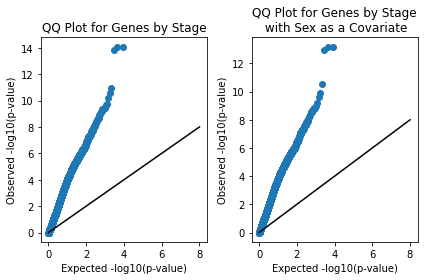

In [166]:
# QQ plot
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(uni_logp, logP)
ax[0].plot([8,0], [8, 0], color = "black")
ax[0].set_xlabel("Expected -log10(p-value)")
ax[0].set_ylabel("Observed -log10(p-value)")
ax[0].set_title('QQ Plot for Genes by Stage')

ax[1].scatter(uni_logp, sexlogP)
ax[1].plot([8,0], [8, 0], color = "black")
ax[1].set_xlabel("Expected -log10(p-value)")
ax[1].set_ylabel("Observed -log10(p-value)")
ax[1].set_title('QQ Plot for Genes by Stage\n with Sex as a Covariate')

fig.tight_layout()
plt.show()

In [168]:
# Create correction and new dataframes with genes that fall within threshold
# Create diff exp files for sex and no sex
f1 = open('diff_exp_genes.txt','w')
f2 = open('diff_exp_genes_sex.txt','w')

fdr = 0.1/8613
fdr_df = log2_df[log2_df['p']<fdr]
sex_fdr_df = log2_df[log2_df['sex_p']<fdr]
genes = list(fdr_df['gene_name'].unique())
for gene in genes:
    f1.write(gene)
    f1.write('\n')
sex_genes = list(sex_fdr_df['gene_name'].unique())
for gene in sex_genes:
    f2.write(gene)
    f2.write('\n')
f1.close()
f2.close()

In [169]:
# Percent overlap for sex and no sex diff exp. genes
f3 = open('percent_overlap.txt','w')
setA = set(genes)
setB = set(sex_genes)

overlap = setA & setB

percent_overlap = float(len(overlap)) / len(setA) * 100
f3.write('Percent overlap of diff. expressed genes with and without sex as a covariate: '+str(percent_overlap)+'%')
f3.close()

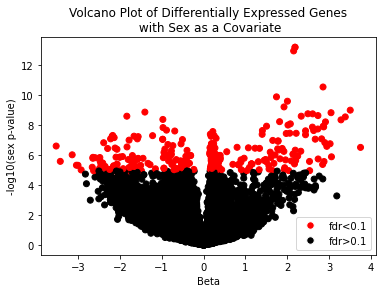

In [170]:
# Volcano plot
fig,ax = plt.subplots()

colors = []
for pval in log2_df['sex_p']:
    if pval<fdr:
        colors.append('r') 
    else:
        colors.append('k') 
ax.scatter(beta, -1*np.log10(log2_df['sex_p']),color = colors)
ax.set_title('Volcano Plot of Differentially Expressed Genes\n with Sex as a Covariate')
ax.set_xlabel('Beta')
ax.set_ylabel('-log10(sex p-value)')
legend_elements = [Line2D([0], [0], marker='.', color='w', label='fdr<0.1',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='.', color='w', label='fdr>0.1',
                          markerfacecolor='k', markersize=15)]
ax.legend(handles=legend_elements, loc='lower right')
plt.show()